In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import re
import collections
from os import listdir
from os.path import isfile, join
from pprint import pprint
import operator


In [2]:
import gans.utils

In [ ]:
preprocess

In [43]:
def get_graphs(file_path, style ="gan", dist=['normal', 'beta','exponential', 'gamma', 'gumbel'], show_gamma=False, save_figure=False):
    with open(file_path) as f:
        res = json.load(f)
    print(res.keys())
    gans_index = ["wgan", "wgpgan", "nsgan", "lsgan", "mmgan", "nsgan", "began", 'dragan']
    distance_metrics = ["KL-Divergence", "Jensen-Shannon", "Wasserstein-Distance", "Energy-Distance", "GLoss", "DLoss"]
#     distance_metrics = ["Wasserstein-Distance"]
#     distance_metrics = ["KL-Divergence"]
    if style == "gan":
        for gan in gans_index:
            normal = pd.DataFrame(res[gan]['normal'])
            beta = pd.DataFrame(res[gan]['beta'])
            exponential = pd.DataFrame(res[gan]['exponential'])
            gamma = pd.DataFrame(res[gan]['gamma'])
            gumbel = pd.DataFrame(res[gan]['gumbel'])
            for dist in distance_metrics:
                plt.plot(range(len(normal[dist])), normal[dist], label="Normal")
                plt.plot(range(len(normal[dist])), beta[dist], label="Beta")
                plt.plot(range(len(normal[dist])), exponential[dist], label="Exponential")
                if show_gamma is True:
                    plt.plot(range(len(normal[dist])), gamma[dist], label="Gamma")
                plt.plot(range(len(normal[dist])), gumbel[dist], label="Gumbel")
                plt.xlabel("Epoch")
                plt.ylabel(dist)
                plt.title("{2}: {0} on {1}".format(gan.upper(), dist, re.sub("hypertuning/", "", file_path)))
                plt.legend()
                plt.show()
                if save_figure is True:
                    plt.savefig('graphs/{0}_{1}.png'.format(gan, dist), dpi=100)
                plt.clf()
    else:
        for distribution in dist:
            if distribution == dist[0]:
                wgan = pd.DataFrame(res['wgan'][distribution])
                wgpgan = pd.DataFrame(res['wgpgan'][distribution])
                lsgan = pd.DataFrame(res['lsgan'][distribution])
                mmgan = pd.DataFrame(res['mmgan'][distribution])
                nsgan = pd.DataFrame(res['nsgan'][distribution])
                began = pd.DataFrame(res['began'][distribution])
                dragan = pd.DataFrame(res['dragan'][distribution])
            else:
                wgan.append(pd.DataFrame(res['wgan'][distribution]))
                wgpgan.append(pd.DataFrame(res['wgpgan'][distribution]))
                lsgan.append(pd.DataFrame(res['lsgan'][distribution]))
                mmgan.append(pd.DataFrame(res['mmgan'][distribution]))
                nsgan.append(pd.DataFrame(res['nsgan'][distribution]))
                began.append(pd.DataFrame(res['began'][distribution]))
                dragan.append(pd.DataFrame(res['dragan'][distribution]))
            for dist in distance_metrics:
                plt.plot(range(len(wgan[dist])), wgan[dist], label="W")
                plt.plot(range(len(wgpgan[dist])), wgpgan[dist], label="W-GP")
                plt.plot(range(len(lsgan[dist])), lsgan[dist], label="LS")
                plt.plot(range(len(mmgan[dist])), mmgan[dist], label="MM")
                plt.plot(range(len(nsgan[dist])), nsgan[dist], label="NS")
                plt.plot(range(len(began[dist])), began[dist], label="BE")
                plt.plot(range(len(dragan[dist])), dragan[dist], label="DRA")
                plt.xlabel("Epoch")
                plt.ylabel(dist)
                plt.title("{2}: {0} on {1}".format(distribution.title(), dist, re.sub("hypertuning/", "", file_path)))
                plt.legend()

                if save_figure is True:
                    plt.savefig('graphs/{0}_{1}.png'.format(gan, dist), dpi=100)
                plt.show()
                plt.clf()


# def get_optimal(df, var):
    
#     return df


def show(df, opt, save_figure=False):
    gans_index = ["wgan", "wgpgan", "lsgan", "mmgan", "nsgan", "began", 'dragan']
    distribution = ['normal','beta', 'exponential', 'gamma', 'gumbel', 'laplace']
    best = []
    parameters = []
    lo = []
    dd = []
    gg = []
    
    for d in distribution:
#         print(d)
        lo = []
        for i in gans_index:
#             print("{0} | {1} | {2}".format(i, d, df[df.kl==df[(df.gan==i) & (df.distribution==d)].kl.min()].hyperparameter.values[0]))
            dd.append(d)
            gg.append(i)
            best.append(df[df[opt]==df[(df.gan==i) & (df.distribution==d)][opt].min()].hyperparameter.values[0])
            lo.append(df[df[opt]==df[(df.gan==i) & (df.distribution==d)][opt].min()].hyperparameter.values[0])
        x = collections.Counter(lo)
        x = sorted(x.items(), key=operator.itemgetter(1))
#         print(x)
        print(d)
        print("{0} at {1}".format(x[-1:][0][0], x[-1:][0][1]))
    dist, gan, hyp = dd, gg, best
    for index, i in enumerate(hyp):
        with open(hyp[index]) as f:
            res = json.load(f)
        if index==0:
            df = pd.DataFrame(res[gan[index]][dist[index]])
            df["GAN"] = gan[index]
            df["h"] = hyp[index]
            df["dist"] = dist[index]
            df["i"] = index
        else:
            temp = pd.DataFrame(res[gan[index]][dist[index]])
            temp["GAN"] = gan[index]
            temp["h"] = hyp[index]
            temp['i'] = index
            temp['dist'] = dist[index]
            df = df.append(temp)        
    distance_metrics = ["KL-Divergence", "Jensen-Shannon", "Wasserstein-Distance", "Energy-Distance", "GLoss", "DLoss"]
    for dist in df.dist.unique():
        x = df[df.dist==dist]
        wgan = x[x.GAN=="wgan"]
        wgpgan = x[x.GAN=="wgpgan"]
        lsgan = x[x.GAN=="lsgan"]
        mmgan = x[x.GAN=="mmgan"]
        nsgan = x[x.GAN=="nsgan"]
        began = x[x.GAN=="began"]
        dragan = x[x.GAN=="dragan"]
        for var in distance_metrics:
            plt.clf()
            plt.style.use("ggplot")

            plt.plot(range(len(wgan[var])), wgan[var], label="W")
            plt.plot(range(len(wgpgan[var])), wgpgan[var], label="W-GP")
            plt.plot(range(len(lsgan[var])), lsgan[var], label="LS")
            plt.plot(range(len(mmgan[var])), mmgan[var], label="MM")
            plt.plot(range(len(nsgan[var])), nsgan[var], label="NS")
            plt.plot(range(len(began[var])), began[var], label="BE")
            plt.plot(range(len(dragan[var])), dragan[var], label="DRA")
            plt.xlabel("Steps")
            plt.ylabel(var)
            plt.title("{0} on {1} Distribution".format(var.title(), dist.title()))
            plt.legend()
            
            if save_figure is True:
                plt.savefig('tuned/{0}_{1}_{2}.png'.format(dist, var, opt), dpi=250)
            plt.show()
            plt.clf()

            
def grapher(dist, file_name, gan, d, show_gamma=False, save_figure=False):
    with open(file_name) as f:
        res = json.load(f)
        normal = pd.DataFrame(res[gan]['normal'])
        beta = pd.DataFrame(res[gan]['beta'])
        exponential = pd.DataFrame(res[gan]['exponential'])
        gamma = pd.DataFrame(res[gan]['gamma'])
        gumbel = pd.DataFrame(res[gan]['gumbel'])
        laplace = pd.DataFrame(res[gan]['laplace'])
        distance_metrics = ["KL-Divergence", "Jensen-Shannon", "Wasserstein-Distance", "Energy-Distance", "GLoss", "DLoss"]

#         for dist in distance_metrics:

        plt.plot(range(len(normal[dist])), normal[dist], label="Normal")
        plt.plot(range(len(normal[dist])), beta[dist], label="Beta")
        plt.plot(range(len(normal[dist])), exponential[dist], label="Exponential")
        if show_gamma is True:
            plt.plot(range(len(normal[dist])), gamma[dist], label="Gamma")
        plt.plot(range(len(normal[dist])), gumbel[dist], label="Gumbel")
        plt.plot(range(len(normal[dist])), laplace[dist], label="Laplace")
        plt.xlabel("Epoch")
        plt.ylabel(dist)
        plt.title("{1}: {0} optimized for {2} Distribution".format(gan.upper(), dist, re.sub("hypertuning/", "", d.title())))
        plt.autoscale(enable=True)
        plt.legend()
        plt.show()
        if save_figure is True:
            plt.savefig('graphs/{0}_{1}.png'.format(gan, dist), dpi=100)
        plt.clf()


In [44]:
import numpy as np
x = np.array([1,2,3,4,5])
y = np.array([i for i in range(0,900)])

In [49]:
onlyfiles = [f for f in listdir('hypertuning2') if isfile(join('hypertuning2', f))]
file_paths = ['hypertuning2/' + i for i in  onlyfiles]
# import glob
# file_paths = glob.glob('/Users/heart/Dropbox\ (MIT)/6883/hypertuning/*.json')
kl = []
d1_a = []
d1_b = []
d1_c = []
d1_d = []
d1_e = []
d1_f = []
d2 = []
d3 = []
d4 = []
for file_path in file_paths:
    with open(file_path) as f:
        data = json.load(f)
        for k, v in data.items():
            kl = []
            js = []
            wd = []
            ed = []
            for k2, v2 in v.items():
                try:
                    d1_a.append(min(v2["KL-Divergence"]))
                    d1_b.append(min(v2["Jensen-Shannon"]))
                    d1_c.append(min(v2["Wasserstein-Distance"]))
                    d1_d.append(min(v2["Energy-Distance"]))
                    d1_e.append(min(v2["DLoss"]))
                    d1_f.append(min(v2["GLoss"]))
                    d2.append(file_path)
                    d3.append(k)
                    d4.append(k2)
                except:
                    print("ERROR")
df = pd.DataFrame({"kl": d1_a, "js": d1_b, "wd": d1_c, "ed": d1_d, 'dloss': d1_e, 'gloss': d1_f,"hyperparameter": d2, "gan": d3, "distribution": d4})

ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERROR
ERRO

In [50]:
df.head()

,distribution,dloss,ed,gan,gloss,hyperparameter,js,kl,wd
0,exponential,10.003976,38.025994,dragan,0.684199,"hypertuning2/data(0.0001, 128, 100).json",0.644182,3.706247,83.847215
1,normal,10.346548,39.324467,dragan,0.809067,"hypertuning2/data(0.0001, 128, 100).json",0.119394,0.479440,80.090807
2,beta,10.302465,36.756740,dragan,0.791096,"hypertuning2/data(0.0001, 128, 100).json",0.156239,0.495776,66.770240
3,gumbel,10.150753,35.413504,dragan,0.753459,"hypertuning2/data(0.0001, 128, 100).json",0.301381,1.337619,72.887908
4,laplace,10.078847,33.508704,dragan,0.734131,"hypertuning2/data(0.0001, 128, 100).json",0.284959,1.106490,65.872147


In [51]:
df.shape

(2496, 9)

normal
hypertuning2/data(0.001, 128, 100).json at 3
beta
hypertuning2/data(0.001, 128, 100).json at 2
exponential
hypertuning2/data(0.001, 64, 100).json at 4
gamma
hypertuning2/data(0.001, 128, 100).json at 2
gumbel
hypertuning2/data(0.001, 128, 100).json at 2
laplace
hypertuning2/data(0.001, 128, 100).json at 1


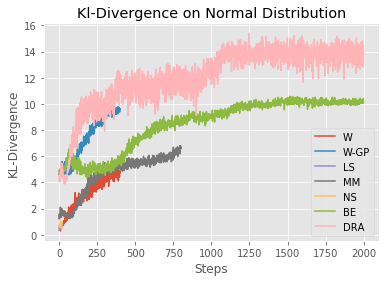

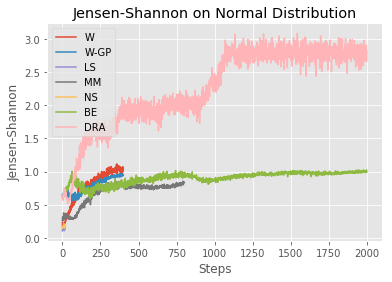

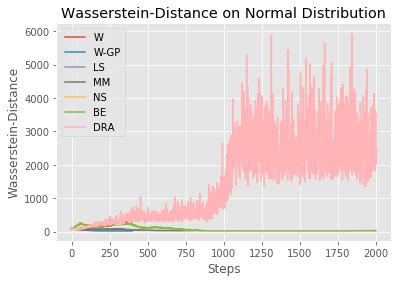

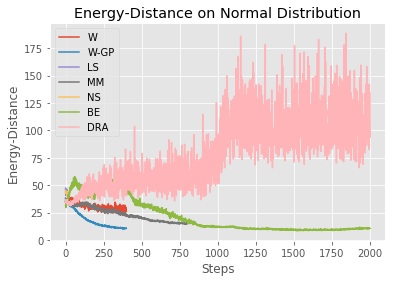

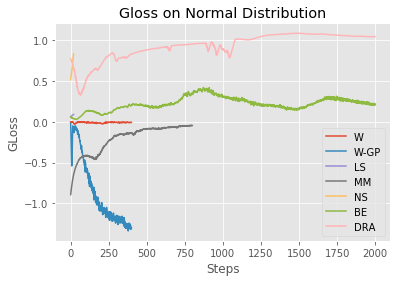

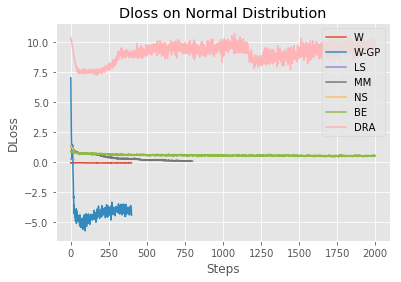

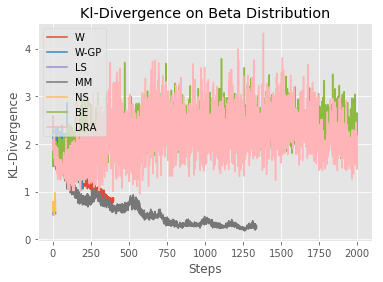

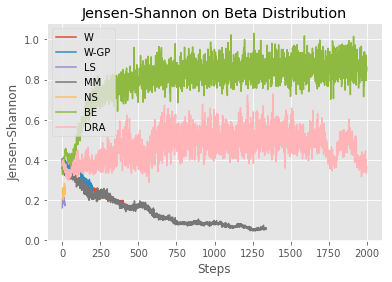

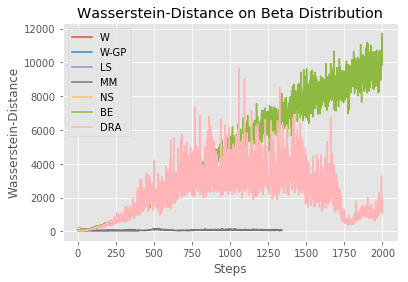

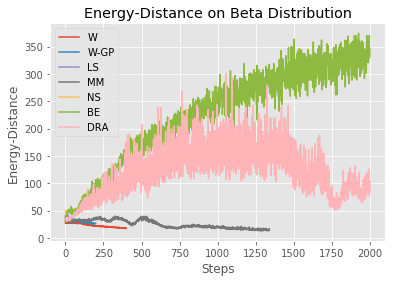

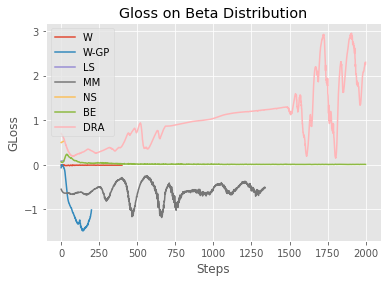

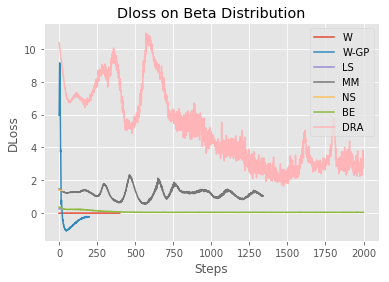

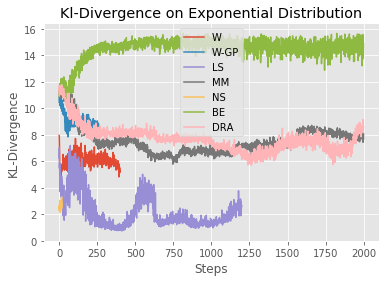

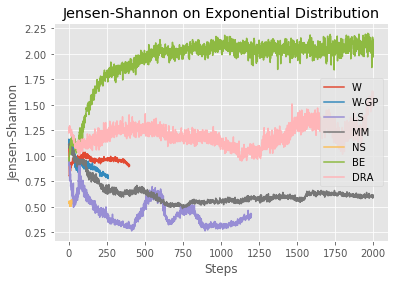

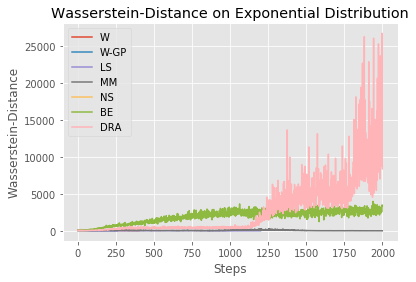

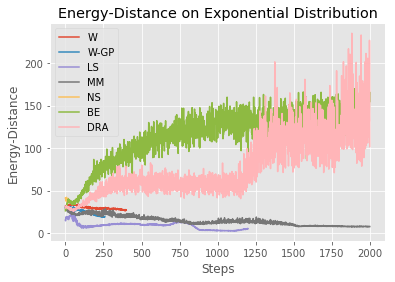

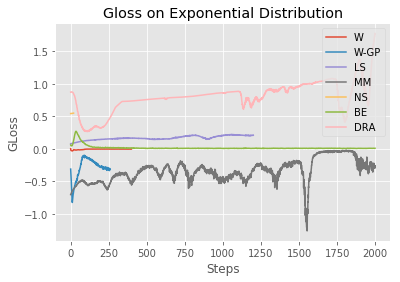

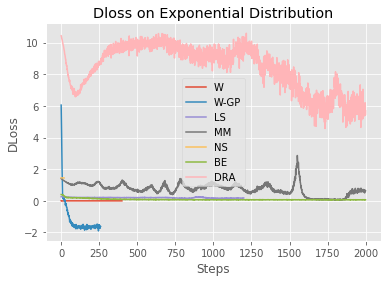

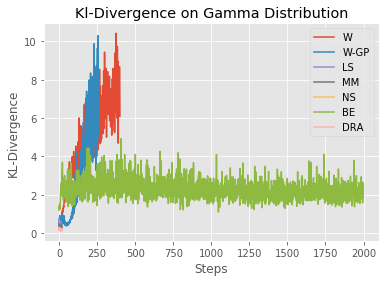

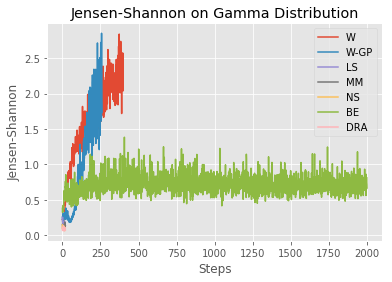

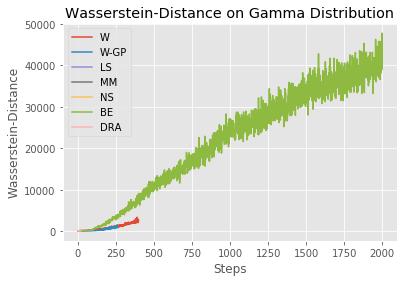

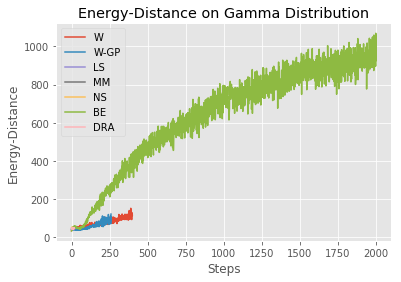

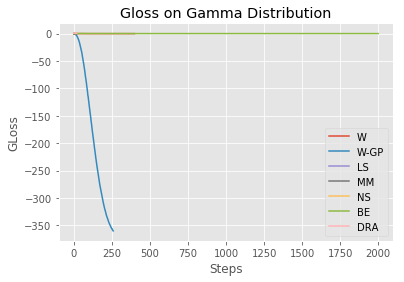

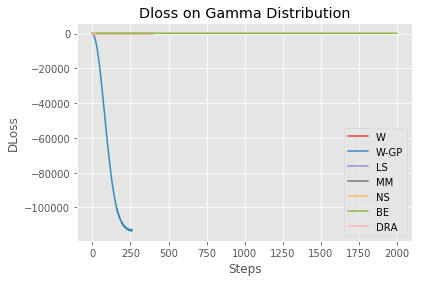

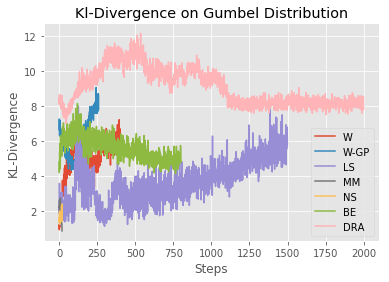

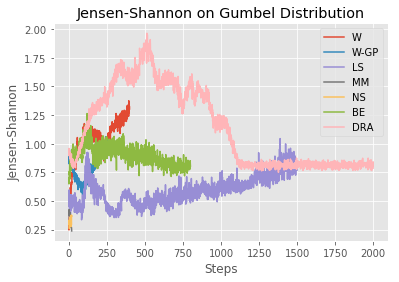

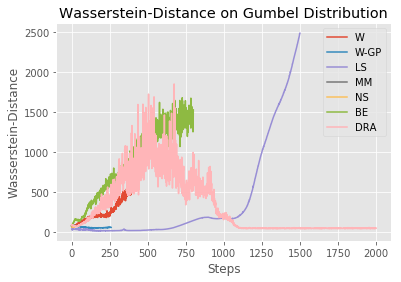

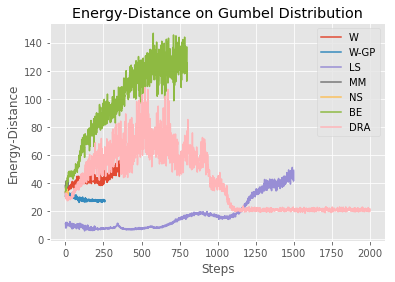

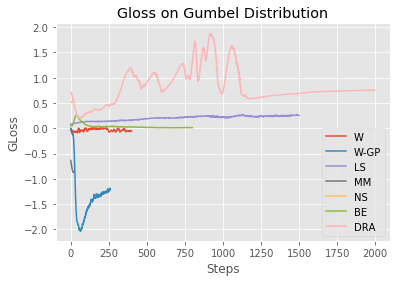

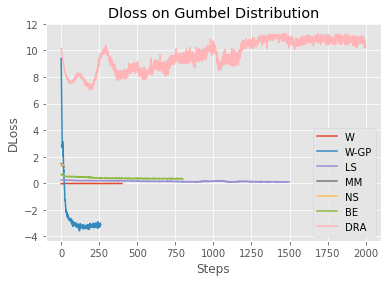

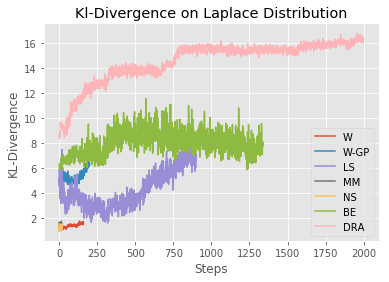

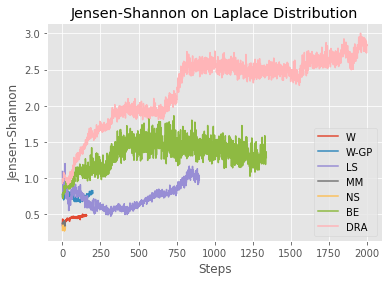

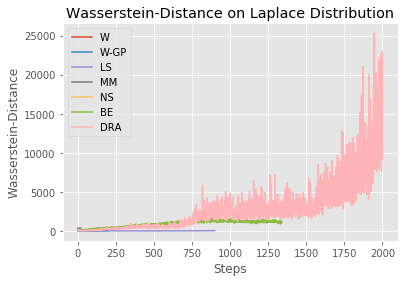

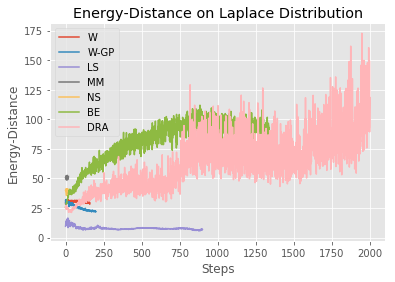

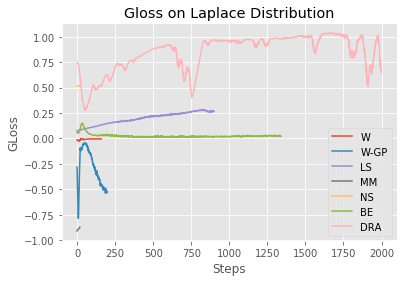

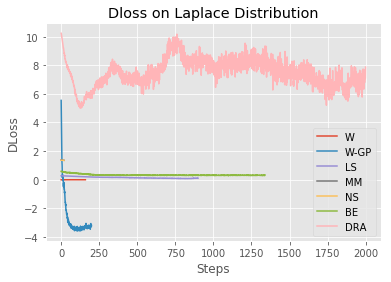

In [52]:
show(df, 'gloss', True)

In [ ]:
normal, beta, exponential

In [53]:
x1 = ['normal','beta', 'exponential', 'gamma', 'gumbel', 'laplace']
x2 = [2,2,1,2,1,1]
x3 = [3,2,4,2,2,1]
df = pd.DataFrame({"Distribution":x1,"Optimal Multivariate": x2, "Optimal Mixture": x3})

In [56]:
m = df.to_latex(index=False)

In [57]:
print(m)

\begin{tabular}{lrr}
\toprule
Distribution &  Optimal Mixture &  Optimal Multivariate \\
\midrule
      normal &                3 &                     2 \\
        beta &                2 &                     2 \\
 exponential &                4 &                     1 \\
       gamma &                2 &                     2 \\
      gumbel &                2 &                     1 \\
     laplace &                1 &                     1 \\
\bottomrule
\end{tabular}



In [ ]:
with open('mnistgoodies.json') as f:
    data = json.load(f)

In [ ]:
for key in data.keys():
    mnist = pd.DataFrame(data[key]['mnist'])
    for i in mnist.columns:
        plt.plot(range(len(mnist[i])), mnist[i])
        plt.xlabel("Epoch")
        plt.ylabel(i)
        plt.title("{2}: {0} on {1}".format(key, 'mnist', re.sub("hypertuning/", "", file_path)))
        plt.legend()
        plt.show()
        plt.clf()